# Notebook 2 - Plotting

Let's first load the libraries:

In [1]:
import os
import time

import hist
import json
import matplotlib.pyplot as plt
import mplhep as hep
from hist.intervals import ratio_uncertainty
import matplotlib as mpl
import numpy as np
import pickle
from collections import OrderedDict

## Plots

Finally, let's make some simple plots:

In [2]:
with open("histograms.pkl", "rb") as f:
    h2 = pickle.load(f)
    print(h2.keys())

dict_keys(['muon_eta', 'njets', 'jets_pt', 'ele_eta', 'muon_pt', 'jets_eta', 'nbjets', 'nmuons', 'ele_pt', 'neles'])


In [3]:
### list of bkgs to plot
dictBkgs = OrderedDict()
dictBkgs["ttbar"] = { "color" : "white", "label" : "$t\\bar{t}$" }
dictBkgs["wjets"] = { "color" : "blue", "label" : "EW" }
dictBkgs["single_top_s_chan"] = { "color" : "green", "label" : "t s-channel" }
dictBkgs["single_top_t_chan"] = { "color" : "lightgreen", "label" : "t t-channel" }
dictBkgs["single_top_tW"] = { "color" : "darkgreen", "label" : "tW" }

bkgs = list(dictBkgs.keys())[::-1]
bkgs_colors = [ col["color"] for i, col in dictBkgs.items() ]
bkgs_label = [ col["label"] for i, col in dictBkgs.items() ]

In [41]:
### Run this cell twice to load the CMS style properly
def plotHisto( histName = "muon_pt", xlabel = "Leading Muon $p_{T}$ [GeV]", rebinFactor = 7, 
                  xmin = 20j, xmax = 300j, mcFactor = 0.05, xlog=False):

    data = h2[histName][ xmin:xmax:hist.rebin(rebinFactor), "data", "nominal"]
    hists = [] 
    tot = data.copy()
    tot.reset()
    for ibkg in bkgs:
        hists.append( (mcFactor*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), ibkg, "nominal"]) )
        tot += (mcFactor*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), ibkg, "nominal"])
    signal = 1000*h2[histName][ xmin:xmax:hist.rebin(rebinFactor), "tttt", "nominal"]

    fig, (ax, rax) = plt.subplots(2, 1, gridspec_kw=dict(height_ratios=[3, 1], hspace=0.03), sharex=True)
    hep.cms.label("Open Data", ax=ax, data=True, lumi=2.6, year=2015) #, rlabel="2.3 $\mathrm{fb^{-1}}$, 2015 (8 TeV)")
    plt.style.use(hep.style.CMS)

    hep.histplot(data, ax=ax, histtype='errorbar', color='k', capsize=4, yerr=True, label="Data")
    hep.histplot(hists, ax=ax, stack=True, histtype='fill', label=bkgs)
    hep.histplot(signal, ax=ax, histtype='step', color='purple', label="$10^{4} \\times$ $t\\bar{t}t\\bar{t}$")

    errps = {'hatch':'////', 'facecolor':'none', 'lw': 0, 'color': 'k', 'alpha': 0.4}
    ax.stairs(
        values=tot.values() + np.sqrt(tot.values()),
        baseline=tot.values() - np.sqrt(tot.values()),
        edges=data.axes[0].edges, **errps, label='Stat. unc.')
    if xlog: ax.set_yscale("log")
    ax.legend()
    
    yerr = ratio_uncertainty(data.values(), tot.values(), 'poisson')
    rax.stairs(1+yerr[1], edges=tot.axes[0].edges, baseline=1-yerr[0], **errps)
    hep.histplot(data.values()/tot.values(), tot.axes[0].edges, yerr=np.sqrt(data.values())/tot.values(),
        ax=rax, histtype='errorbar', color='k', capsize=4, label="Data")


    rax.axhline(1, ls='--', color='k')
    ### more labels
    plt.xlabel(xlabel)
    plt.ylabel(f"Events / {rebinFactor}")
    #plt.ylim([0.01,10e7])
    plt.show()

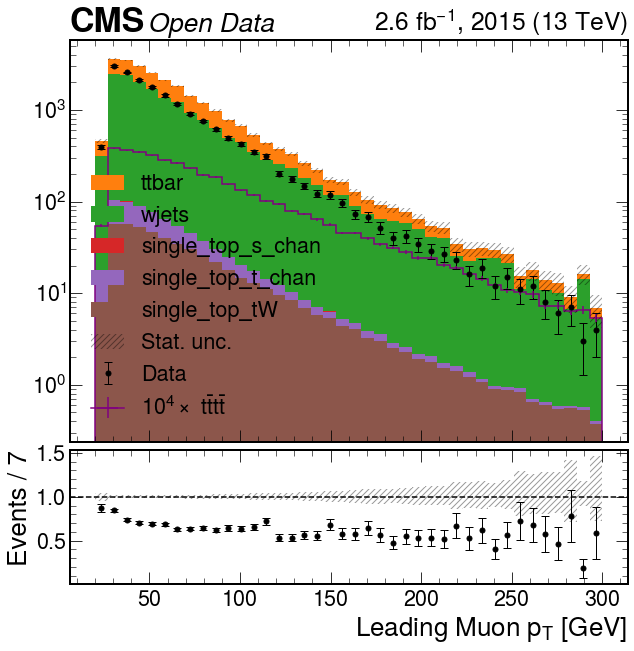

In [42]:
plotHisto(xlog=True)

/tmp/ipykernel_893/1201746046.py:32: RuntimeWarning: invalid value encountered in true_divide
  hep.histplot(data.values()/tot.values(), tot.axes[0].edges, yerr=np.sqrt(data.values())/tot.values(),


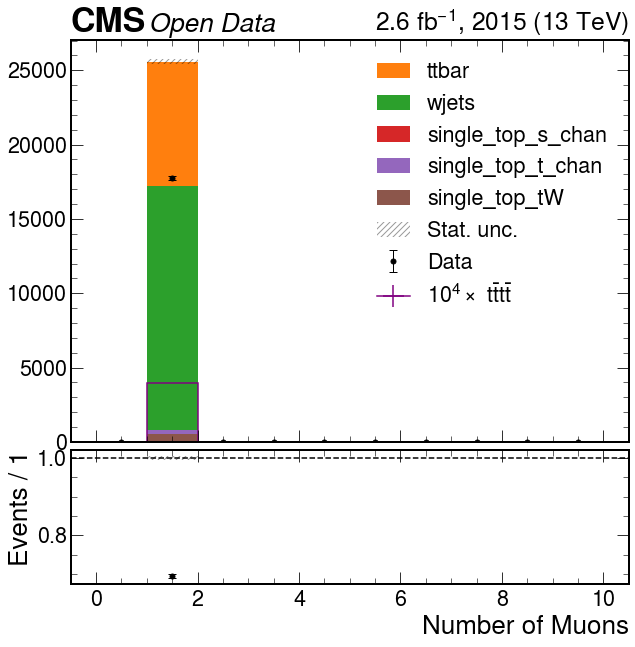

In [43]:
plotHisto(histName = "nmuons", xlabel = "Number of Muons", rebinFactor = 1, xmin = 0j, xmax = 10j, mcFactor = 0.05)

/tmp/ipykernel_893/1201746046.py:32: RuntimeWarning: invalid value encountered in true_divide
  hep.histplot(data.values()/tot.values(), tot.axes[0].edges, yerr=np.sqrt(data.values())/tot.values(),


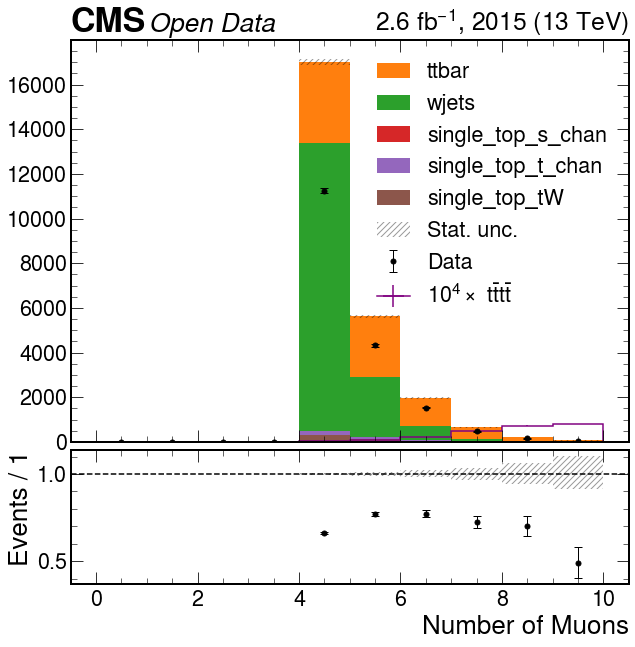

In [44]:
plotHisto(histName = "njets", xlabel = "Number of Muons", rebinFactor = 1, xmin = 0j, xmax = 10j, mcFactor = 0.05)